<a href="https://colab.research.google.com/github/AntonioWh1te/The-Journey/blob/main/Phase%204%3A%20Data%20Preparation%20and%20Feature%20Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter your FMP API Key Here: ··········


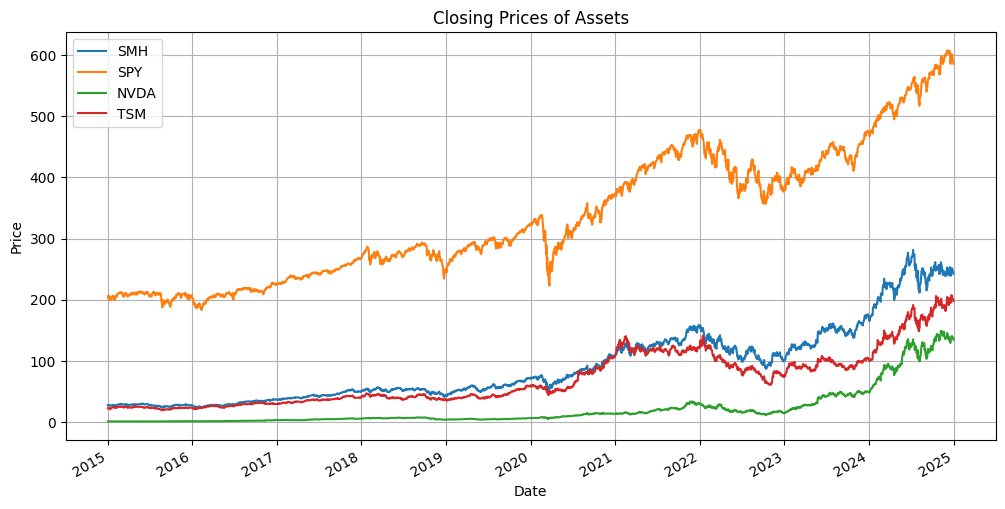

In [9]:
import pandas as pd
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import numpy as np

# FMP API Key
apikey = getpass.getpass("Enter your FMP API Key Here: ")

# Define Assets and Range
assets = ['SMH', 'SPY', 'NVDA', 'TSM']
start = '2015-01-01'
end = '2025-01-01'

# Function to fetch historical data from FMP
def get_historical_data(symbol, start, end, apikey):
    url = f"https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?from={start}&to={end}&apikey={apikey}"
    response = requests.get(url)
    data = response.json()

    # Check if 'historical' key exists, otherwise print the error message
    if 'historical' in data:
        df = pd.DataFrame(data['historical'])
        df['date'] = pd.to_datetime(df['date'])  # convert 'date' column to datetime
        df.set_index('date', inplace=True)  # Set 'date as the index
        return df
    else:
        print(
            f"Error: 'historical' key not found in data for {symbol}. Response: {data}"
        )
        return None  # or raise an exception if preferred


# Fetch data for each asset
data = {}
for asset in assets:
    data[asset] = get_historical_data(asset, start, end, apikey)

# Check if data was successfully fetched before proceeding
# Change: Use all() with a list comprehension to check for None values
if all([value is not None for value in data.values()]):
    all_data = pd.concat(data.values(), keys=data.keys(), axis=1)
    # Select the 'close' column for each asset
    close_prices = all_data.loc[:, (slice(None), 'close')]
    # Drop the second level of the column index (the 'close' label)
    close_prices.columns = close_prices.columns.droplevel(1)
    # Plot the closing prices
    close_prices.plot(figsize=(12, 6))  # Adjust figsize as needed
    plt.title('Closing Prices of Assets')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()  # Display the plot
else:
    print(
        "Data fetching failed for one or more assets. Please check the error messages."
    )



Enter your FMP API Key Here: ··········


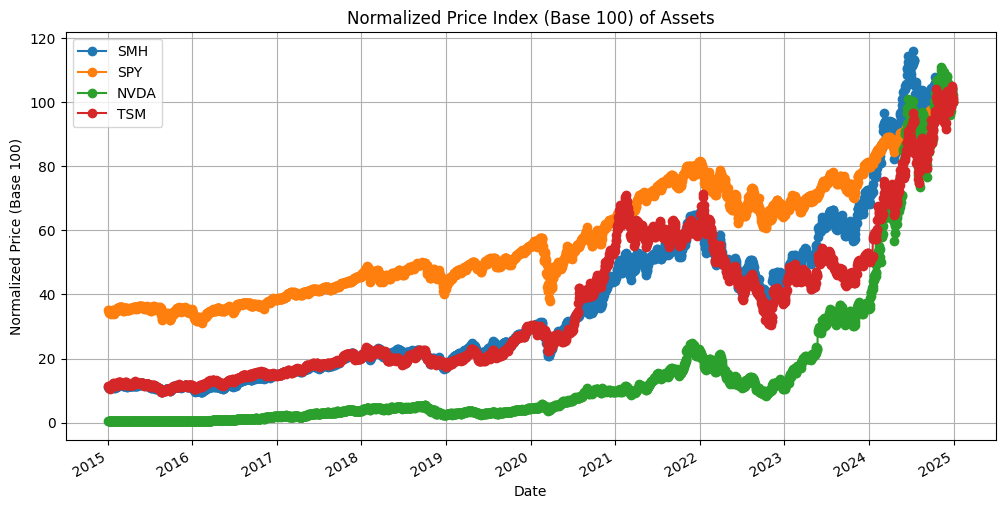

In [10]:
import pandas as pd
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import numpy as np

# FMP API Key
apikey = getpass.getpass("Enter your FMP API Key Here: ")

# Define Assets and Range
assets = ['SMH', 'SPY', 'NVDA', 'TSM']
start = '2015-01-01'
end = '2025-01-01'

# Function to fetch historical data from FMP
def get_historical_data(symbol, start, end, apikey):
    url = f"https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?from={start}&to={end}&apikey={apikey}"
    response = requests.get(url)
    data = response.json()

    # Check if 'historical' key exists, otherwise print the error message
    if 'historical' in data:
        df = pd.DataFrame(data['historical'])
        df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime
        df.set_index('date', inplace=True)         # Set 'date' as the index
        return df
    else:
        print(f"Error: 'historical' key not found in data for {symbol}. Response: {data}")
        return None  # or raise an exception if preferred

# Fetch data for each asset
data = {}
for asset in assets:
    data[asset] = get_historical_data(asset, start, end, apikey)

# Check if data was successfully fetched before proceeding
if all([value is not None for value in data.values()]):
    all_data = pd.concat(data.values(), keys=data.keys(), axis=1)
    # Select the 'close' column for each asset
    close_prices = all_data.loc[:, (slice(None), 'close')]
    # Drop the second level of the column index (the 'close' label)
    close_prices.columns = close_prices.columns.droplevel(1)

    # ------------------------------
    # NEW: Normalize the Prices
    # ------------------------------
    # Normalize each asset's closing prices so that the first available price equals 100.
    normalized_prices = (close_prices / close_prices.iloc[0]) * 100

    # Plot the normalized prices
    normalized_prices.plot(figsize=(12, 6), marker='o')
    plt.title('Normalized Price Index (Base 100) of Assets')
    plt.xlabel('Date')
    plt.ylabel('Normalized Price (Base 100)')
    plt.grid(True)
    plt.show()
else:
    print("Data fetching failed for one or more assets. Please check the error messages.")


In Practice
For example, in a quantitative finance project:

Data Preparation might involve fetching historical stock prices, handling missing days (like market holidays), and normalizing prices for comparison.
Feature Engineering might involve calculating the daily percentage change, moving averages over different time windows, or technical indicators like the Relative Strength Index (RSI) to help predict future price movements.

Enter your FMP API Key Here: ··········


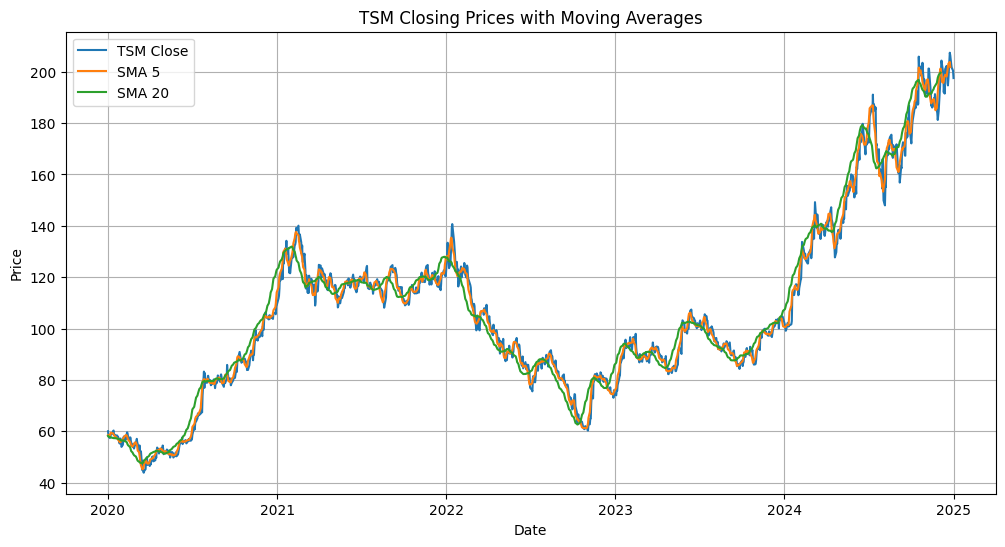

In [13]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import getpass

# FMP API Key
apikey = getpass.getpass("Enter your FMP API Key Here: ")

# Define Asset and Range
asset = 'TSM'
start = '2020-01-01'
end = '2025-01-01'

# Function to fetch historical data from FMP
def get_historical_data(symbol, start, end, apikey):
    url = f"https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?from={start}&to={end}&apikey={apikey}"
    response = requests.get(url)
    data = response.json()

    if 'historical' in data:
        df = pd.DataFrame(data['historical'])
        df['date'] = pd.to_datetime(df['date'])
        df.set_index('date', inplace=True)
        return df
    else:
        print(f"Error: 'historical' key not found in data for {symbol}. Response: {data}")
        return None

# Fetch data for TSM
data = get_historical_data(asset, start, end, apikey)

# Data Preparation and Feature Engineering
if data is not None:
    # 1. Calculate Daily Returns
    data['daily_return'] = data['close'].pct_change()

    # 2. Calculate Moving Averages (e.g., 5-day and 20-day)
    data['SMA_5'] = data['close'].rolling(window=5).mean()
    data['SMA_20'] = data['close'].rolling(window=20).mean()

    # 3. Calculate Volatility (e.g., rolling standard deviation)
    data['volatility'] = data['daily_return'].rolling(window=20).std()

    # ... (Add more features as needed) ...

    # Plot some features
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['close'], label='TSM Close')
    plt.plot(data.index, data['SMA_5'], label='SMA 5')
    plt.plot(data.index, data['SMA_20'], label='SMA 20')
    plt.title('TSM Closing Prices with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Data fetching failed for TSM. Please check the error messages.")